# Cricket Umpire Action Classification

# About this project
This is a deep learning project and This is a multiclassification dataset for classifying an umpire’s actions during a cricket game.

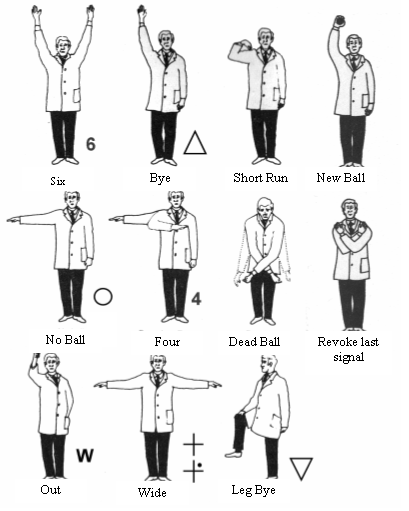

# Problem Statment
With the help of video footage or live streaming data, a novel system is being developed to classify umpire actions in cricket matches. This innovative system will accurately detect and identify signals for boundaries, wicket declarations, no-balls/wides, and change of innings. By providing rapid predictions in real time, the system aims to enhance the viewer experience, decrease errors, and simplify match analysis.

# Data Set Information
There are 312 images in the train and 78 images in the test folder.
The dataset contains 5 categories: no ball, out, sixes, wide, and no action.


In [1]:
# Import Neccesary Libraries
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

#import tensorflow and keras
import tensorflow as ten
from tensorflow import keras
import cv2
import os
import random


# **Data Preparation**

### Each file in folder put in paths_train list

In [2]:
paths_train=[]
for dirname, _, filenames in os.walk('D:\\Umpire gessture pridiction\\train'):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths_train+=[(os.path.join(dirname, filename))]
print(paths_train[0:3])

['D:\\Umpire gessture pridiction\\train\\no_action_10.jpg', 'D:\\Umpire gessture pridiction\\train\\no_action_12.jpg', 'D:\\Umpire gessture pridiction\\train\\no_action_14.jpg']


### Using opencv read train data of image and put in images list

In [3]:
#Using opencv read train data of image and put in images list then convert to array in give name as x_train
images=[]
for path in paths_train:
    image=cv2.imread(path)
    image=cv2.resize(image, dsize=(224,224))
    images.append(image)
x_train=np.array(images)

### Each file in folder put in paths_test list

In [4]:
paths_test=[]
for dirname, _, filenames in os.walk('D:\\Umpire gessture pridiction\\test'):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths_test+=[(os.path.join(dirname, filename))]
print(paths_test[0:3])

['D:\\Umpire gessture pridiction\\test\\no_action_1.jpg', 'D:\\Umpire gessture pridiction\\test\\no_action_11.jpg', 'D:\\Umpire gessture pridiction\\test\\no_action_13.jpg']


### Using opencv read **test data** of image and put in images list

In [5]:
#Using opencv read test data of image and put in images list then convert to array in give name as x_test
images=[]
for path in paths_test:
    image=cv2.imread(path)
    image=cv2.resize(image, dsize=(224,224))
    images.append(image)
x_test=np.array(images)

In [6]:
# shape of x_train
x_train.shape

(312, 224, 224, 3)

**Interpretation:** Here we see that shape of x_train

In [7]:
# shape of x_test
x_test.shape

(78, 224, 224, 3)

**Interpretation:** Here we see that shape of x_test

In [8]:
train_directory='D:\\Umpire gessture pridiction\\train'
test_directory='D:\\Umpire gessture pridiction\\test'

### Make dataframe for the files and it's labels

In [9]:
def path_label_df(directory):
    
    """
    returns dataframe of images paths and class labels in a dirctory 
    """
    image_path = []
    class_label = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            class_name = filename.split("_")[:-1]
            class_name = ' '.join(class_name)

            image_path.append(img_path)
            class_label.append(class_name)

    return pd.DataFrame({'image_path':image_path,'class_label':class_label})

In [10]:
# run code using function
train_df = path_label_df(train_directory)
test_df = path_label_df(test_directory)

In [11]:
#top 5 data
train_df.head()

,image_path,class_label
0,D:\Umpire gessture pridiction\train\no_action_...,no action
1,D:\Umpire gessture pridiction\train\no_action_...,no action
2,D:\Umpire gessture pridiction\train\no_action_...,no action
3,D:\Umpire gessture pridiction\train\no_action_...,no action
4,D:\Umpire gessture pridiction\train\no_action_...,no action


In [12]:
# dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   312 non-null    object
 1   class_label  312 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


<AxesSubplot:xlabel='class_label', ylabel='count'>

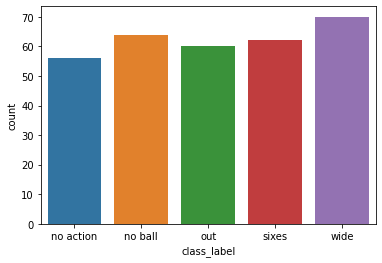

In [13]:
sns.countplot(x='class_label',data=train_df)

In [14]:
# give output varible for train and test
y_train=train_df.class_label
y_test=test_df.class_label

**Interpretation:** Dataframe column class_label give as output variable

In [15]:
# convert to numeric form
y_train=y_train.replace({'no action':0,'no ball':1,'out':2,'sixes':3,'wide':4})
y_train=np.array(y_train)

y_test=y_test.replace({'no action':0,'no ball':1,'out':2,'sixes':3,'wide':4})
y_test=np.array(y_test)

**Interpretation:** Convert categorical data as numeric

In [16]:
# scalling the data for better performnace
x_train=x_train/255
x_test=x_test/255

**Interpretation:** Scale the data

# Make Model

## 1. CNN Model

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [18]:
#make Sequential model
model_cnn = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5,activation='softmax')
              ])
#Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy',
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

In [19]:
#train our model
history_train = model_cnn.fit(x_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
10/10 [==============================] - 10s 901ms/step - loss: 1.6770 - accuracy: 0.2564
Epoch 2/30
10/10 [==============================] - 9s 893ms/step - loss: 1.5089 - accuracy: 0.4327
Epoch 3/30
10/10 [==============================] - 9s 874ms/step - loss: 1.2684 - accuracy: 0.5096
Epoch 4/30
10/10 [==============================] - 9s 897ms/step - loss: 0.9581 - accuracy: 0.6154
Epoch 5/30
10/10 [==============================] - 9s 893ms/step - loss: 0.7827 - accuracy: 0.7308
Epoch 6/30
10/10 [==============================] - 9s 907ms/step - loss: 0.5349 - accuracy: 0.8205
Epoch 7/30
10/10 [==============================] - 9s 898ms/step - loss: 0.3536 - accuracy: 0.8718
Epoch 8/30
10/10 [==============================] - 9s 914ms/step - loss: 0.2038 - accuracy: 0.9423
Epoch 9/30
10/10 [==============================] - 9s 889ms/step - loss: 0.0793 - accuracy: 0.9840
Epoch 10/30
10/10 [==============================] - 9s 880ms/step - loss: 0.0308 - accuracy: 1.000

## Model evaluation

In [20]:
# evaluate our model using test data
model_cnn.evaluate(x_test,y_test)

3/3 [==============================] - 1s 223ms/step - loss: 3.7164 - accuracy: 0.6795


[3.7163872718811035, 0.6794871687889099]

In [21]:
#predict test data
y_predict=model_cnn.predict(x_test)
y_predict=list(y_predict)

3/3 [==============================] - 1s 221ms/step


In [22]:
# our accuracy is 0.61 so, we replace value that greater than 0.60 to 1 i.e 1 means that our outout from the 5 neuron
for i in range(78):
    for j in range(5):
        if (y_predict[i][j])>0.60:
            y_predict[i][j]=1

In [23]:
# we concat our predict and actual test data then we comapre for the 5 neurom predict data to actual test data
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s2=pd.DataFrame(y_test,columns=['y_test'])

In [24]:
pd.concat([s1,s2],axis=1)

,no action,no ball,out,sixes,wide,y_test
0,1.000000,0.000000,0.000000,0.000000,0.000003,0
1,0.091569,0.496446,0.369967,0.012079,0.029939,0
2,0.000003,0.000108,0.000039,0.016880,1.000000,0
3,0.000004,0.000002,0.000006,1.000000,0.000000,0
4,1.000000,0.001075,0.000881,0.000000,0.000129,0
5,1.000000,0.001102,0.001381,0.010254,0.000001,0
6,0.000001,0.000839,0.000000,0.000000,1.000000,0
7,1.000000,0.000156,0.000337,0.000021,0.000076,0
8,0.000000,0.000000,0.000000,0.000000,1.000000,0
9,0.440903,0.557545,0.000329,0.000084,0.001140,0


In [25]:
    
conditions = ['no action', 'no ball', 'out', 'sixes', 'wide']
filtered_data = {condition: s1[s1[condition] == 1] for condition in conditions}

array([1.7035575e-06, 1.0000000e+00, 9.1514896e-10, 2.2971665e-10,
       1.5731655e-04], dtype=float32)

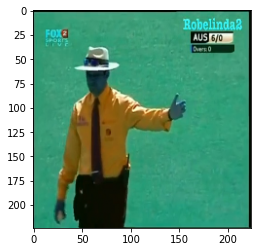

In [26]:
plt.imshow(x_test[26])
y_predict[26]

## 2. Resnet50 model

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the ResNet50 model (pre-trained on ImageNet)
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained ResNet50
x = Flatten()(resnet.output)
x = Dense(512, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  

# Create the model
model = Model(inputs=resnet.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [28]:
model_resnet= model.fit(x_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
10/10 [==============================] - 29s 3s/step - loss: 25.0423 - accuracy: 0.2147
Epoch 2/30
10/10 [==============================] - 25s 3s/step - loss: 5.9296 - accuracy: 0.2532
Epoch 3/30
10/10 [==============================] - 26s 3s/step - loss: 3.5620 - accuracy: 0.2821
Epoch 4/30
10/10 [==============================] - 25s 3s/step - loss: 2.6002 - accuracy: 0.3814
Epoch 5/30
10/10 [==============================] - 25s 2s/step - loss: 1.8532 - accuracy: 0.3846
Epoch 6/30
10/10 [==============================] - 23s 2s/step - loss: 1.1738 - accuracy: 0.4968
Epoch 7/30
10/10 [==============================] - 23s 2s/step - loss: 0.8953 - accuracy: 0.6474
Epoch 8/30
10/10 [==============================] - 23s 2s/step - loss: 0.8342 - accuracy: 0.6795
Epoch 9/30
10/10 [==============================] - 23s 2s/step - loss: 0.7412 - accuracy: 0.7404
Epoch 10/30
10/10 [==============================] - 24s 2s/step - loss: 0.7652 - accuracy: 0.7596
Epoch 11/30
10/10 

## Model evaluation

In [29]:
# evaluate our model using test data
model.evaluate(x_test,y_test)

3/3 [==============================] - 8s 2s/step - loss: 1.2147 - accuracy: 0.5897


[1.2146793603897095, 0.5897436141967773]

In [30]:
y_predict=model.predict(x_test)
# we concat our predict and actual test data then we comapre for the 5 neurom predict data to actual test data
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s2=pd.DataFrame(y_test,columns=['y_test'])
pd.concat([s1,s2],axis=1)

3/3 [==============================] - 7s 2s/step


,no action,no ball,out,sixes,wide,y_test
0,0.352695,0.015495,0.001552,0.001572,0.628686,0
1,0.137013,0.066586,0.007349,0.006278,0.782775,0
2,0.018840,0.003270,0.841740,0.036025,0.100125,0
3,0.575736,0.049162,0.197213,0.133893,0.043996,0
4,0.300454,0.057826,0.104805,0.493153,0.043762,0
5,0.672741,0.005851,0.004459,0.014480,0.302469,0
6,0.405248,0.141345,0.003503,0.004747,0.445157,0
7,0.703130,0.074881,0.002699,0.007788,0.211503,0
8,0.822142,0.048295,0.011894,0.014250,0.103419,0
9,0.245506,0.088665,0.038940,0.024694,0.602195,0


## 3. VGG16 Model

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model (pre-trained on ImageNet)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained VGG16
x = Flatten()(vgg16.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  

# Create the model
model = Model(inputs=vgg16.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
model_vgg= model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
10/10 [==============================] - 73s 7s/step - loss: 18.6241 - accuracy: 0.2244
Epoch 2/20
10/10 [==============================] - 57s 6s/step - loss: 1.1360 - accuracy: 0.6058
Epoch 3/20
10/10 [==============================] - 57s 6s/step - loss: 0.3905 - accuracy: 0.8526
Epoch 4/20
10/10 [==============================] - 56s 6s/step - loss: 0.1166 - accuracy: 0.9615
Epoch 5/20
10/10 [==============================] - 56s 6s/step - loss: 0.0496 - accuracy: 0.9872
Epoch 6/20
10/10 [==============================] - 57s 6s/step - loss: 0.0656 - accuracy: 0.9840
Epoch 7/20
10/10 [==============================] - 57s 6s/step - loss: 0.0076 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 58s 6s/step - loss: 0.0515 - accuracy: 0.9872
Epoch 9/20
10/10 [==============================] - 57s 6s/step - loss: 0.0613 - accuracy: 0.9840
Epoch 10/20
10/10 [==============================] - 57s 6s/step - loss: 0.0107 - accuracy: 0.9968
Epoch 11/20
10/10 

## Model evaluation

In [33]:
# evaluate our model using test data
model.evaluate(x_test,y_test)

3/3 [==============================] - 13s 4s/step - loss: 1.2175 - accuracy: 0.7692


[1.2175451517105103, 0.7692307829856873]

In [34]:
y_predict=model.predict(x_test)
# we concat our predict and actual test data then we comapre for the 5 neurom predict data to actual test data
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s2=pd.DataFrame(y_test,columns=['y_test'])
pd.concat([s1,s2],axis=1)

3/3 [==============================] - 13s 4s/step


,no action,no ball,out,sixes,wide,y_test
0,0.999822,0.000128,0.000048,0.000000,0.000002,0
1,0.975168,0.009182,0.008239,0.001652,0.005759,0
2,0.989100,0.006662,0.004164,0.000061,0.000012,0
3,0.000793,0.000710,0.998467,0.000030,0.000000,0
4,0.829109,0.004842,0.166028,0.000020,0.000000,0
5,0.999919,0.000016,0.000044,0.000010,0.000011,0
6,0.000021,0.000041,0.000002,0.000059,0.999877,0
7,0.880794,0.117716,0.000570,0.000516,0.000404,0
8,0.048459,0.006249,0.003602,0.009094,0.932596,0
9,0.614086,0.002044,0.000608,0.007686,0.375576,0


# 4. vgg19 Model

In [35]:
from tensorflow.keras.applications import VGG19

# Load the VGG19 model (pre-trained on ImageNet)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg19.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained VGG19
x = Flatten()(vgg19.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  

# Create the model
model = Model(inputs=vgg19.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [36]:
model_vgg= model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
10/10 [==============================] - 72s 7s/step - loss: 16.8742 - accuracy: 0.2436
Epoch 2/20
10/10 [==============================] - 71s 7s/step - loss: 0.9593 - accuracy: 0.6442
Epoch 3/20
10/10 [==============================] - 70s 7s/step - loss: 0.3045 - accuracy: 0.8878
Epoch 4/20
10/10 [==============================] - 72s 7s/step - loss: 0.1715 - accuracy: 0.9455
Epoch 5/20
10/10 [==============================] - 69s 7s/step - loss: 0.0693 - accuracy: 0.9776
Epoch 6/20
10/10 [==============================] - 70s 7s/step - loss: 0.0365 - accuracy: 0.9936
Epoch 7/20
10/10 [==============================] - 69s 7s/step - loss: 0.0100 - accuracy: 0.9968
Epoch 8/20
10/10 [==============================] - 69s 7s/step - loss: 0.0291 - accuracy: 0.9936
Epoch 9/20
10/10 [==============================] - 69s 7s/step - loss: 0.1257 - accuracy: 0.9744
Epoch 10/20
10/10 [==============================] - 70s 7s/step - loss: 0.0629 - accuracy: 0.9808
Epoch 11/20
10/10 

# Model evaluation

In [37]:
# evaluate our model using test data
model.evaluate(x_test,y_test)

3/3 [==============================] - 21s 6s/step - loss: 0.8313 - accuracy: 0.7949


[0.8313060402870178, 0.7948718070983887]

In [38]:
y_predict=model.predict(x_test)
# we concat our predict and actual test data then we comapre for the 5 neurom predict data to actual test data
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s2=pd.DataFrame(y_test,columns=['y_test'])
pd.concat([s1,s2],axis=1)

3/3 [==============================] - 19s 6s/step


,no action,no ball,out,sixes,wide,y_test
0,0.999916,0.000060,0.000024,0.000000,0.000000,0
1,0.911998,0.071416,0.014791,0.000295,0.001500,0
2,0.997700,0.000010,0.002289,0.000000,0.000001,0
3,0.000264,0.000098,0.999632,0.000005,0.000000,0
4,0.943197,0.000447,0.056342,0.000009,0.000005,0
5,0.999507,0.000002,0.000487,0.000003,0.000002,0
6,0.148548,0.015353,0.056551,0.029130,0.750418,0
7,0.419176,0.461607,0.039241,0.048405,0.031571,0
8,0.782412,0.005016,0.001326,0.000025,0.211221,0
9,0.906214,0.020588,0.009775,0.002294,0.061128,0


# 5 InceptionV3 model

In [39]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the InceptionV3 model (pre-trained on ImageNet)
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in inceptionv3.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained InceptionV3
x = Flatten()(inceptionv3.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  

# Create the model
model = Model(inputs=inceptionv3.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                

 conv2d_15 (Conv2D)             (None, 25, 25, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_11[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_26 (Conv2D)             (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_27

                                                                                                  
 activation_29 (Activation)     (None, 12, 12, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_4[0][0]']        
                                                                                                  
 conv2d_38 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
          

                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 12, 12, 160)  480        ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_59 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_59[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_69 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_70

                                                                                                  
 activation_73 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_88 (Conv2D)             (None, 5, 5, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
          

                                                                                                  
 activation_88 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_97[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [40]:
model_vgg= model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
10/10 [==============================] - 37s 2s/step - loss: 125.3157 - accuracy: 0.2917
Epoch 2/20
10/10 [==============================] - 25s 2s/step - loss: 1.6329 - accuracy: 0.6923
Epoch 3/20
10/10 [==============================] - 22s 2s/step - loss: 0.4349 - accuracy: 0.8397
Epoch 4/20
10/10 [==============================] - 22s 2s/step - loss: 0.0971 - accuracy: 0.9679
Epoch 5/20
10/10 [==============================] - 22s 2s/step - loss: 0.0462 - accuracy: 0.9744
Epoch 6/20
10/10 [==============================] - 23s 2s/step - loss: 0.0211 - accuracy: 0.9936
Epoch 7/20
10/10 [==============================] - 22s 2s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 22s 2s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 22s 2s/step - loss: 6.0885e-04 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 22s 2s/step - loss: 3.9674e-04 - accuracy: 1.0000
Epoch 11/

# Model evaluation

In [41]:
# evaluate our model using test data
model.evaluate(x_test,y_test)

3/3 [==============================] - 7s 1s/step - loss: 1.4106 - accuracy: 0.7436


[1.4106225967407227, 0.7435897588729858]

In [42]:
y_predict=model.predict(x_test)
# we concat our predict and actual test data then we comapre for the 5 neurom predict data to actual test data
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s2=pd.DataFrame(y_test,columns=['y_test'])
pd.concat([s1,s2],axis=1)

3/3 [==============================] - 5s 1s/step


,no action,no ball,out,sixes,wide,y_test
0,0.999991,0.000000,0.000008,0.000000,0.000000,0
1,0.138179,0.054070,0.091483,0.017076,0.699192,0
2,0.000619,0.002426,0.797329,0.000039,0.199587,0
3,0.000001,0.000000,0.999998,0.000000,0.000001,0
4,0.992602,0.004237,0.002922,0.000001,0.000238,0
5,0.873965,0.071585,0.048603,0.000233,0.005614,0
6,1.000000,0.000000,0.000000,0.000000,0.000000,0
7,1.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.045263,0.014308,0.002132,0.003939,0.934358,0
9,1.000000,0.000000,0.000000,0.000000,0.000000,0


# Capture frame from the video

In [43]:
import cv2

def capture_frames(video_path, output_path, interval):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Check if the video file was successfully opened
    if not video.isOpened():
        print("Error opening video file")
        return

    # Initialize variables
    frame_count = 0
    time_counter = 0

    # Read frames from the video
    while True:
        # Read the next frame
        ret, frame = video.read()

        # Check if a frame was successfully read
        if not ret:
            break

        # Increment the frame count
        frame_count += 1

        # Calculate the time in seconds for the current frame
        frame_time = frame_count / video.get(cv2.CAP_PROP_FPS)

        # Check if the current frame time is within the desired interval
        if frame_time >= time_counter:
            # Save the frame as an image
            output_file = f"{output_path}/frame_{frame_count}.jpg"
            cv2.imwrite(output_file, frame)

            # Increment the time counter by the specified interval
            time_counter += interval

    # Release the video object
    video.release()

    print(f"Frames captured: {frame_count}")


# Specify the interval in seconds for capturing frames
interval = 2  # Every 10 seconds

# Specify the path of the video file
video_path=r"D:\\Umpire gessture pridiction\\videoplayback (1).webm"

# Specify the output directory for the captured frames
output_directory = r"D:\\Umpire gessture pridiction\\capture images"

# Call the function to capture frames from the video
capture_frames(video_path, output_directory,interval)

Frames captured: 10472


In [44]:
## load in list

In [45]:
#Each file in folder put in paths_train list
paths_new=[]
for dirname, _, filenames in os.walk(r"D:\\Umpire gessture pridiction\\capture images"):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths_new+=[(os.path.join(dirname, filename))]
print(paths_train[0:3])

['D:\\Umpire gessture pridiction\\train\\no_action_10.jpg', 'D:\\Umpire gessture pridiction\\train\\no_action_12.jpg', 'D:\\Umpire gessture pridiction\\train\\no_action_14.jpg']


In [46]:
#Using opencv read train data of image and put in images list then convert to array in give name as x_new
images=[]
for path in paths_new:
    image=cv2.imread(path)
    image=cv2.resize(image, dsize=(224,224))
    images.append(image)
# take as x_new
x_new=np.array(images)

In [47]:
# Take vgg16 model because give better accuracy
y_predict=model.predict(x_new)

6/6 [==============================] - 9s 1s/step


In [48]:
y_predict[0:3]

array([[1.0433125e-18, 1.8656544e-03, 0.0000000e+00, 9.9813443e-01,
        3.3863194e-30],
       [6.1110661e-36, 7.5323821e-14, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [2.9649762e-03, 0.0000000e+00, 0.0000000e+00, 9.9703503e-01,
        0.0000000e+00]], dtype=float32)

In [49]:
# dataframe of video frame output
s1=pd.DataFrame(y_predict,columns=['no action','no ball','out','sixes','wide'])
s1

,no action,no ball,out,sixes,wide
0,0.000000,0.001866,0.000000,0.998134,0.000000
1,0.000000,0.000000,0.000000,1.000000,0.000000
2,0.002965,0.000000,0.000000,0.997035,0.000000
3,0.000000,0.000000,0.000000,0.999973,0.000027
4,0.000368,0.000000,0.000000,0.999632,0.000000
5,0.000000,0.082142,0.000000,0.917858,0.000000
6,0.995182,0.000000,0.000000,0.000000,0.004818
7,0.000000,0.000000,0.000000,1.000000,0.000000
8,0.000174,0.000000,0.000000,0.999826,0.000000
9,0.000000,0.000000,0.000000,1.000000,0.000000


0

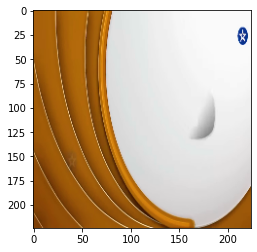

In [50]:
plt.imshow(x_new[26])
np.argmax(y_predict[26])

**Interpreyayion:** Show photo and predicted output value i.e. no action